[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Arahmanizadeh/gsproginpython/blob/main/Course1_Lesson09.ipynb)

# 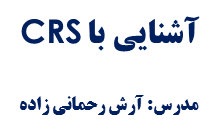

## What is a Coordinate Reference System (CRS)?

* Implicit with any GIS data is a spatial reference system. 
* It can consist of a simple arbitrary reference system such as a 10 m x 10 m sampling grid in a rectangle or,
* it can consist of a geographic reference system, i.e. one where the spatial features are mapped to an earth based reference system.

The focus of this topic is on earth reference systems which can be based on 
* a Geographic Coordinate System (GCS) 
* or a Project Coordinate System (PCS).

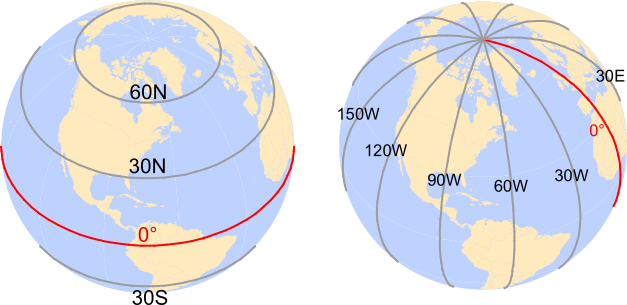

## Geographic Coordinate System (GCS)

A geographic coordinate system is a reference system for identifying locations on the curved surface of the earth. </br> Locations on the earth’s surface are measured in angular units from the center of the earth relative to two planes: 
* the plane defined by the equator 
* and the plane defined by the prime meridian (which crosses Greenwich England). 

A location is therefore defined by two values: a latitudinal value and a longitudinal value.

In [ ]:
!pip install geopandas

A GCS is defined by **an ellipsoid, geoid and datum**. 

### Sphere and Ellipsoid

<table>
<thead>
  <tr>
    <td>
    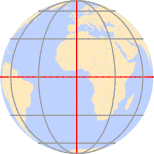
    </td>
    <td> 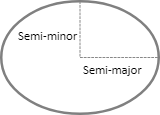
    </td>
  </tr>
</thead>
</table>



### Geoid

Representing the earth’s true shape, the geoid, as a mathematical model is crucial for a GIS environment.

Note that we are not including mountains and ocean bottoms in our discussion, instead we are focusing solely on the earth’s gravitational potential which can be best visualized by imagining the earth’s surface completely immersed in water and measuring the distance from the earth’s center to the water surface over the entire earth surface.

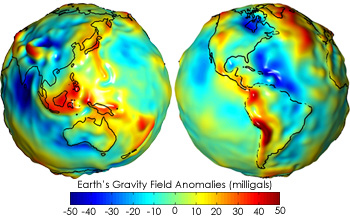

### Datum

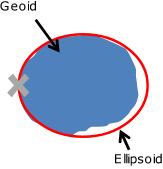

So how are we to reconcile our need to work with a (simple) mathematical model of the earth’s shape with the ondulating nature of the earth’s surface (i.e. its geoid)? The solution is to align the geoid with the ellipsoid (or sphere) representation of the earth and to map the earth’s surface features onto this ellipsoid/sphere. The alignment can be local where the ellipsoid surface is closely fit to the geoid at a particular location on the earth’s surface (such as the state of Kansas) or geocentric where the ellipsoid is aligned with the center of the earth. How one chooses to align the ellipsoid to the geoid defines a datum.

### Geocentric Datum

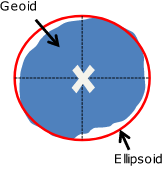

Many of the modern datums use a geocentric alignment. These include the popular World Geodetic Survey for 1984 (WGS84) and the North American Datums of 1983 (NAD83). Most of the popular geocentric datums use the WGS84 ellipsoid or the GRS80 ellipsoid. These two ellipsoids share nearly identical semi-major and semi-minor axes: 6,378,137 meters and 6,356,752 meters respectively.

## Projected Coordinate Systems

### Planar Projections

#### Tangent Case

A planar projection (aka Azimuthal projection) maps the earth surface features to a flat surface that touches the earth’s surface at a point (tangent case),

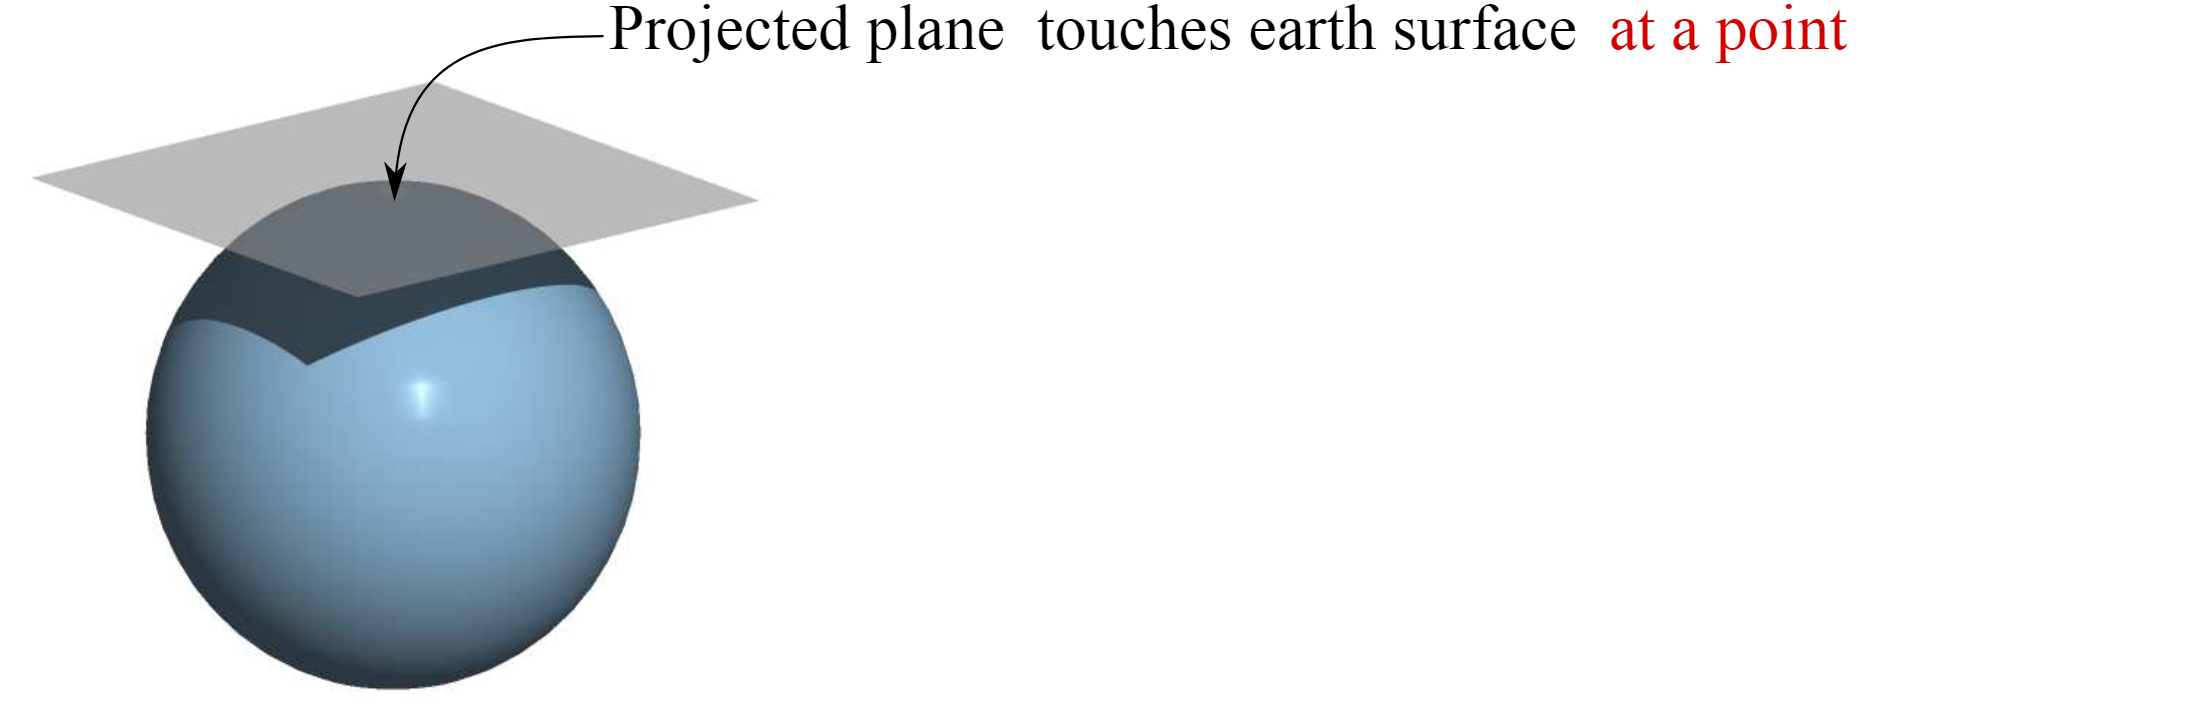

#### Secant Case

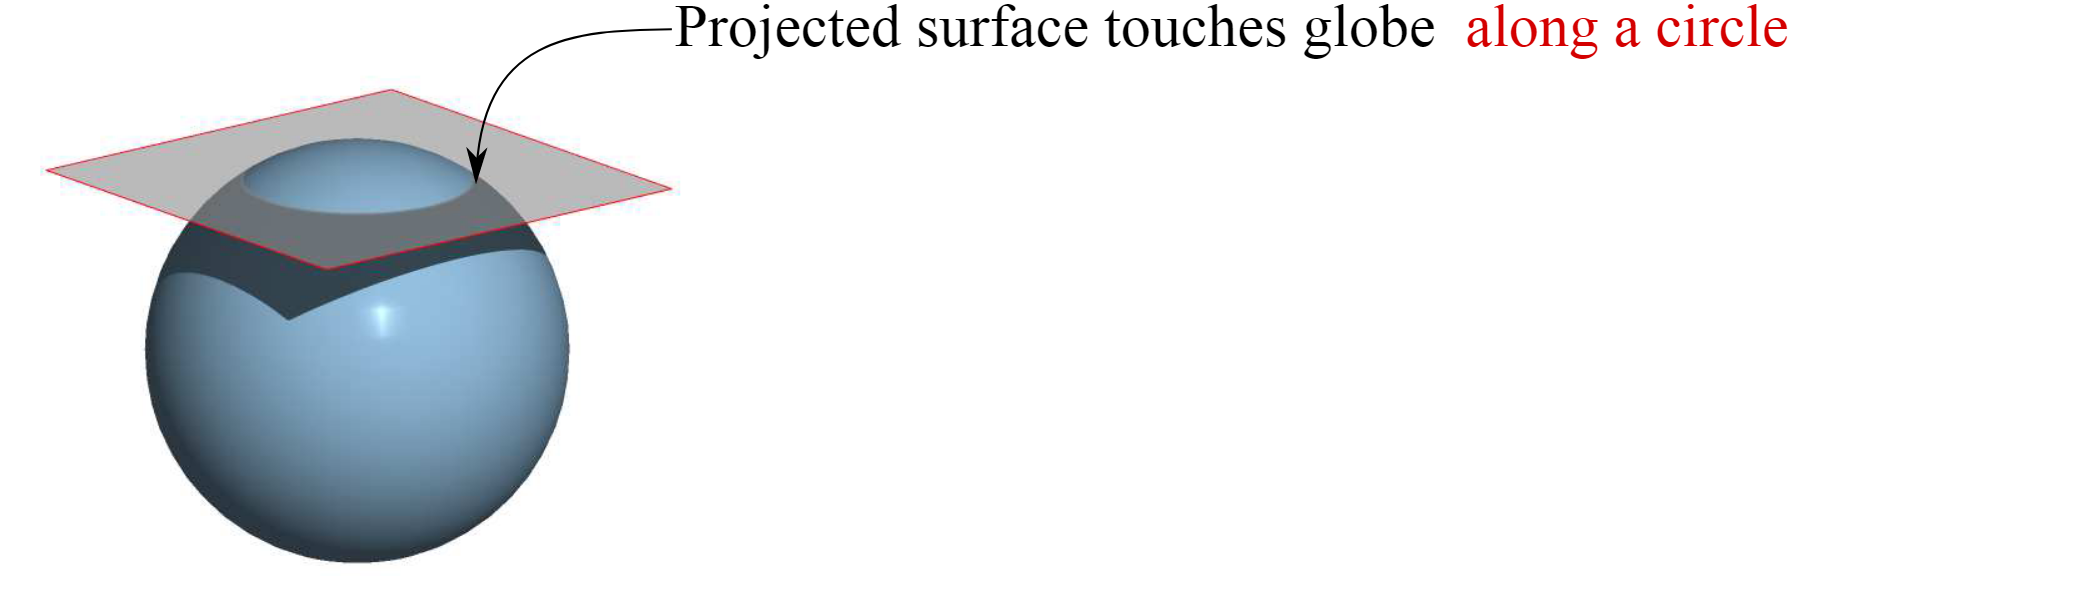

This projection is often used in mapping polar regions but can be used for any location on the earth’s surface (in which case they are called oblique planar projections).

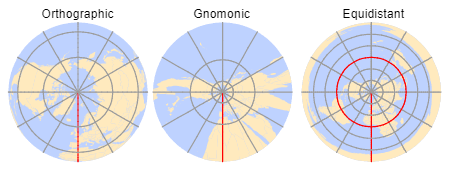

Examples of three planar projections - orthographic (left), gnomonic (center) and equidistant (right). Each covers a different spatial range (with the latter covering both northern and southern hemispheres) and each preserves a unique set of spatial properties.

### Cylindrical Projection

#### tangent case

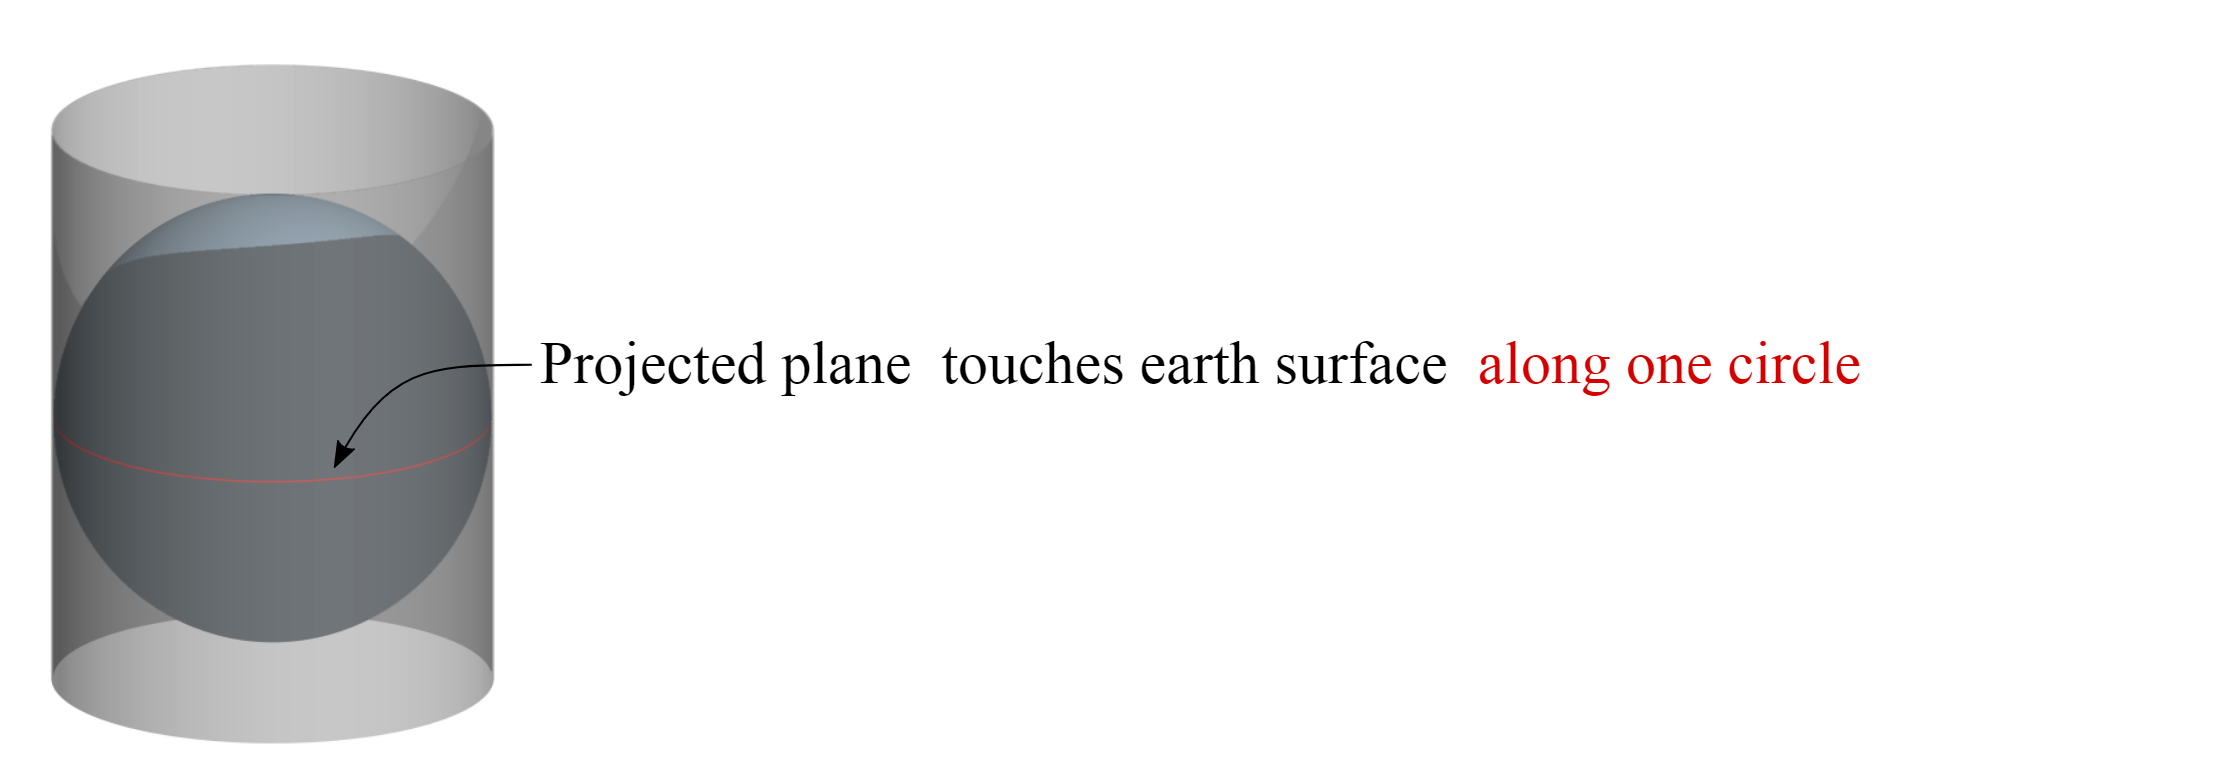

#### secant case

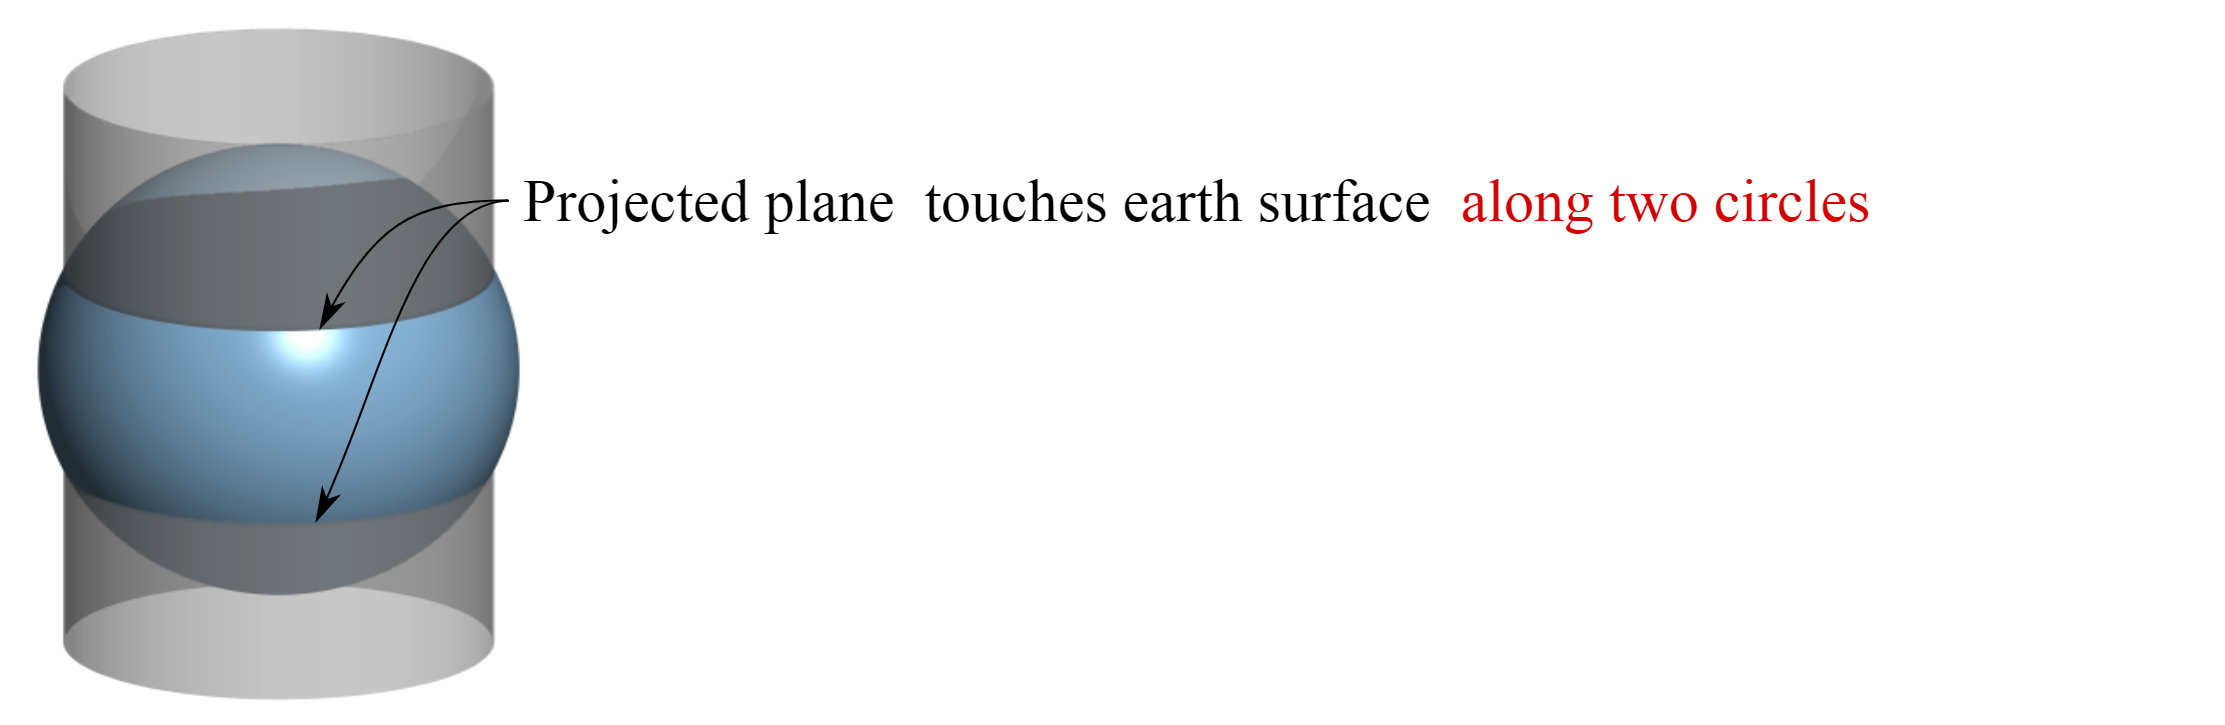

The cylinder can be tangent to the equator or it can be oblique. A special case is the Transverse aspect which is tangent to lines of longitude. This is a popular projection used in defining the Universal Transverse Mercator (UTM) and State Plane coordinate systems. The UTM PCS covers the entire globe and is a popular coordinate system in the US. It’s important to note that the UTM PCS is broken down into zones and therefore limits its extent to these zones that are 6° wide. For example, the State of Maine (USA) uses the UTM coordinate system (Zone 19 North) for most of its statewide GIS maps. Most USGS quad maps are also presented in a UTM coordinate system. Popular datums tied to the UTM coordinate system in the US include NAD27 and NAD83. There is also a WGS84 based UTM coordinate system.

Distortion is minimized along the tangent or secant lines and increases as the distance from these lines increases.

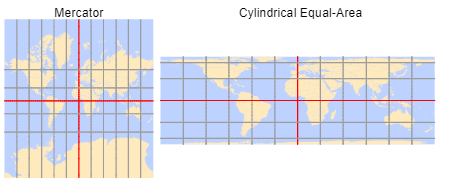

### Conical Projection

#### tangent case

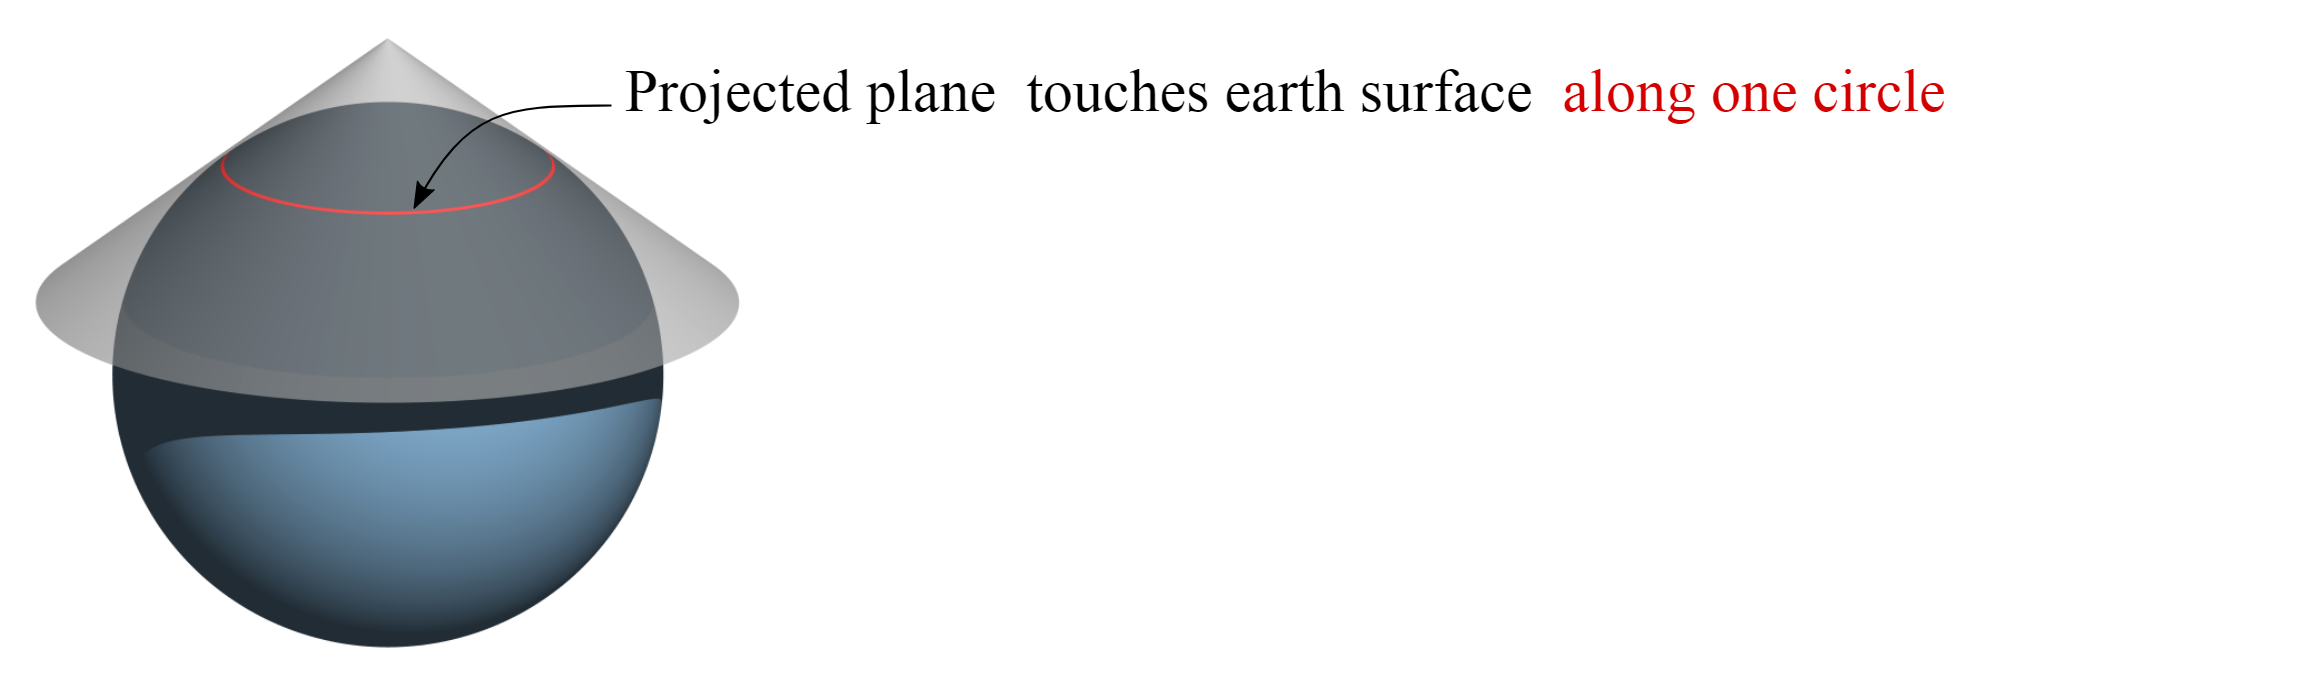

####  secant case

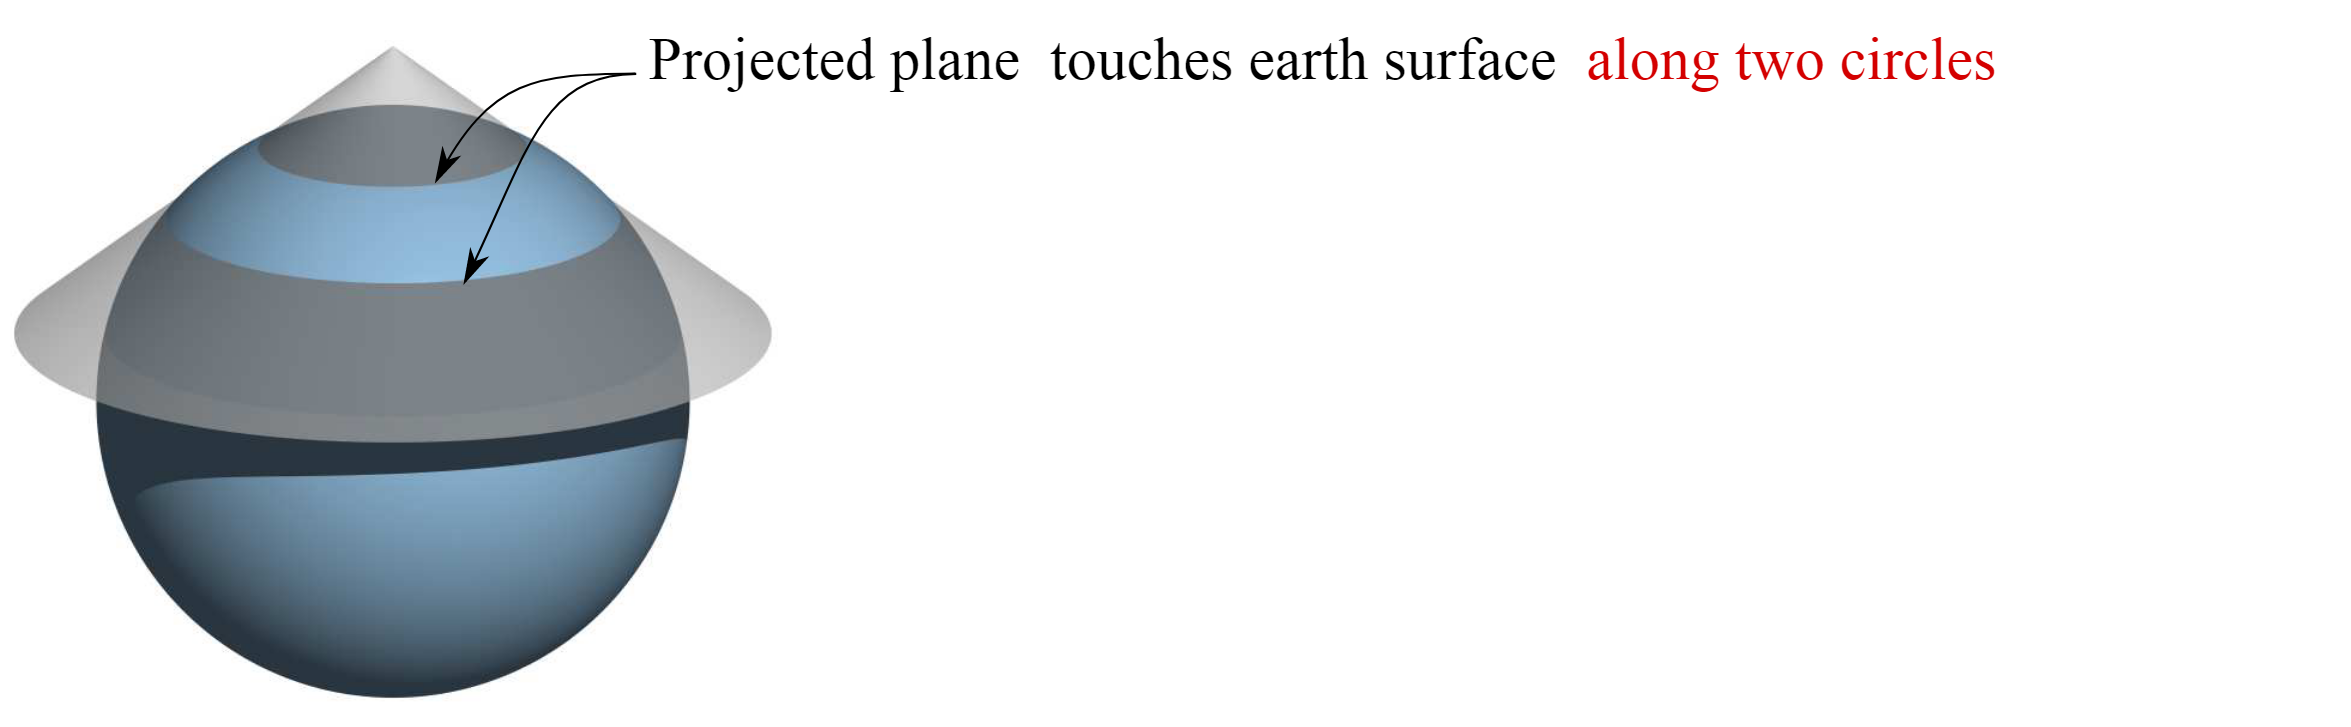

Distortion is minimized along the tangent or secant lines and increases as the distance from these lines increases. When distance or area measurements are needed for the contiguous 48 states, use one of the conical projections such as Equidistant Conic (distance preserving) or Albers Equal Area Conic (area preserving).

Conical projections are also popular PCS’ in European maps such as Europe Albers Equal Area Conic and Europe Lambert Conformal Conic.

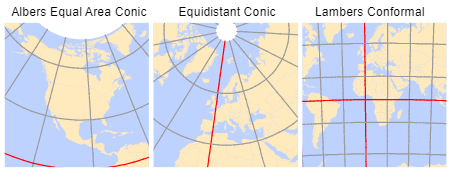

 Examples of three conical projections - Albers equal area (preserves area), equidistant (preserves distance) and conformal (preserves shape).

## Intro to Coordinate Reference Systems

A coordinate reference system tells Python where and how to place coordinates on Earth’s surface.

In [ ]:
import geopandas as gpd

dc = gpd.read_file("https://opendata.arcgis.com/datasets/7241f6d500b44288ad983f0942b39663_10.geojson")

### Checking a dataset’s coordinate reference system

### Change a dataset’s CRS

using the to_crs() function:
* once with a PROJ.4 string and 
* once with an EPSG code

NAD83: 
Source: https://spatialreference.org/ref/epsg/nad83/

The "no_defs" item ensures that no defaults are read from the defaults files. Sometimes they cause suprising problems. [ref](https://gis.stackexchange.com/questions/122571/proj-4-general-parameters-no-defs)

In [ ]:
print("Example 1 (PROJ.4 string) CRS: {}".format(dc_reproject_proj4.crs))

print("Example 2 (EPSG code) CRS: {}".format(dc_reproject_epsg.crs))

### PROJ.4 String

A PROJ.4 string identifies and defines a particular CRS. The string holds the parameters (e.g., units, datum) of a given CRS.

#### What is in a PROJ.4 string?

<table class="colwidths-auto table">
<thead>
<tr class="row-odd"><th class="head"><p>Parameter</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+a</span></code></p></td>
<td><p>Semimajor radius of the ellipsoid axis</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+axis</span></code></p></td>
<td><p>Axis orientation</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+b</span></code></p></td>
<td><p>Semiminor radius of the ellipsoid axis</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+ellps</span></code></p></td>
<td><p>Ellipsoid name</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+k_0</span></code></p></td>
<td><p>Scaling factor</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+lat_0</span></code></p></td>
<td><p>Latitude of origin</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+lat_1</span> <span class="pre">or</span> <span class="pre">2</span></code></p></td>
<td><p>Standard parallels</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+lon_0</span></code></p></td>
<td><p>Central meridian</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+lon_wrap</span></code></p></td>
<td><p>Center longitude to use for wrapping</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+over</span></code></p></td>
<td><p>Allow longitude output outside -180 to 180 range, disables wrapping</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+pm</span></code></p></td>
<td><p>Alternate prime meridian (typically a city name)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+proj</span></code></p></td>
<td><p>Projection name</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+units</span></code></p></td>
<td><p>meters, US survey feet, etc.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+vunits</span></code></p></td>
<td><p>vertical units</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">+x_0</span></code></p></td>
<td><p>False easting</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">+y_0</span></code></p></td>
<td><p>False northing</p></td>
</tr>
</tbody>
</table>

#### PROJ.4 string Examples

image.png

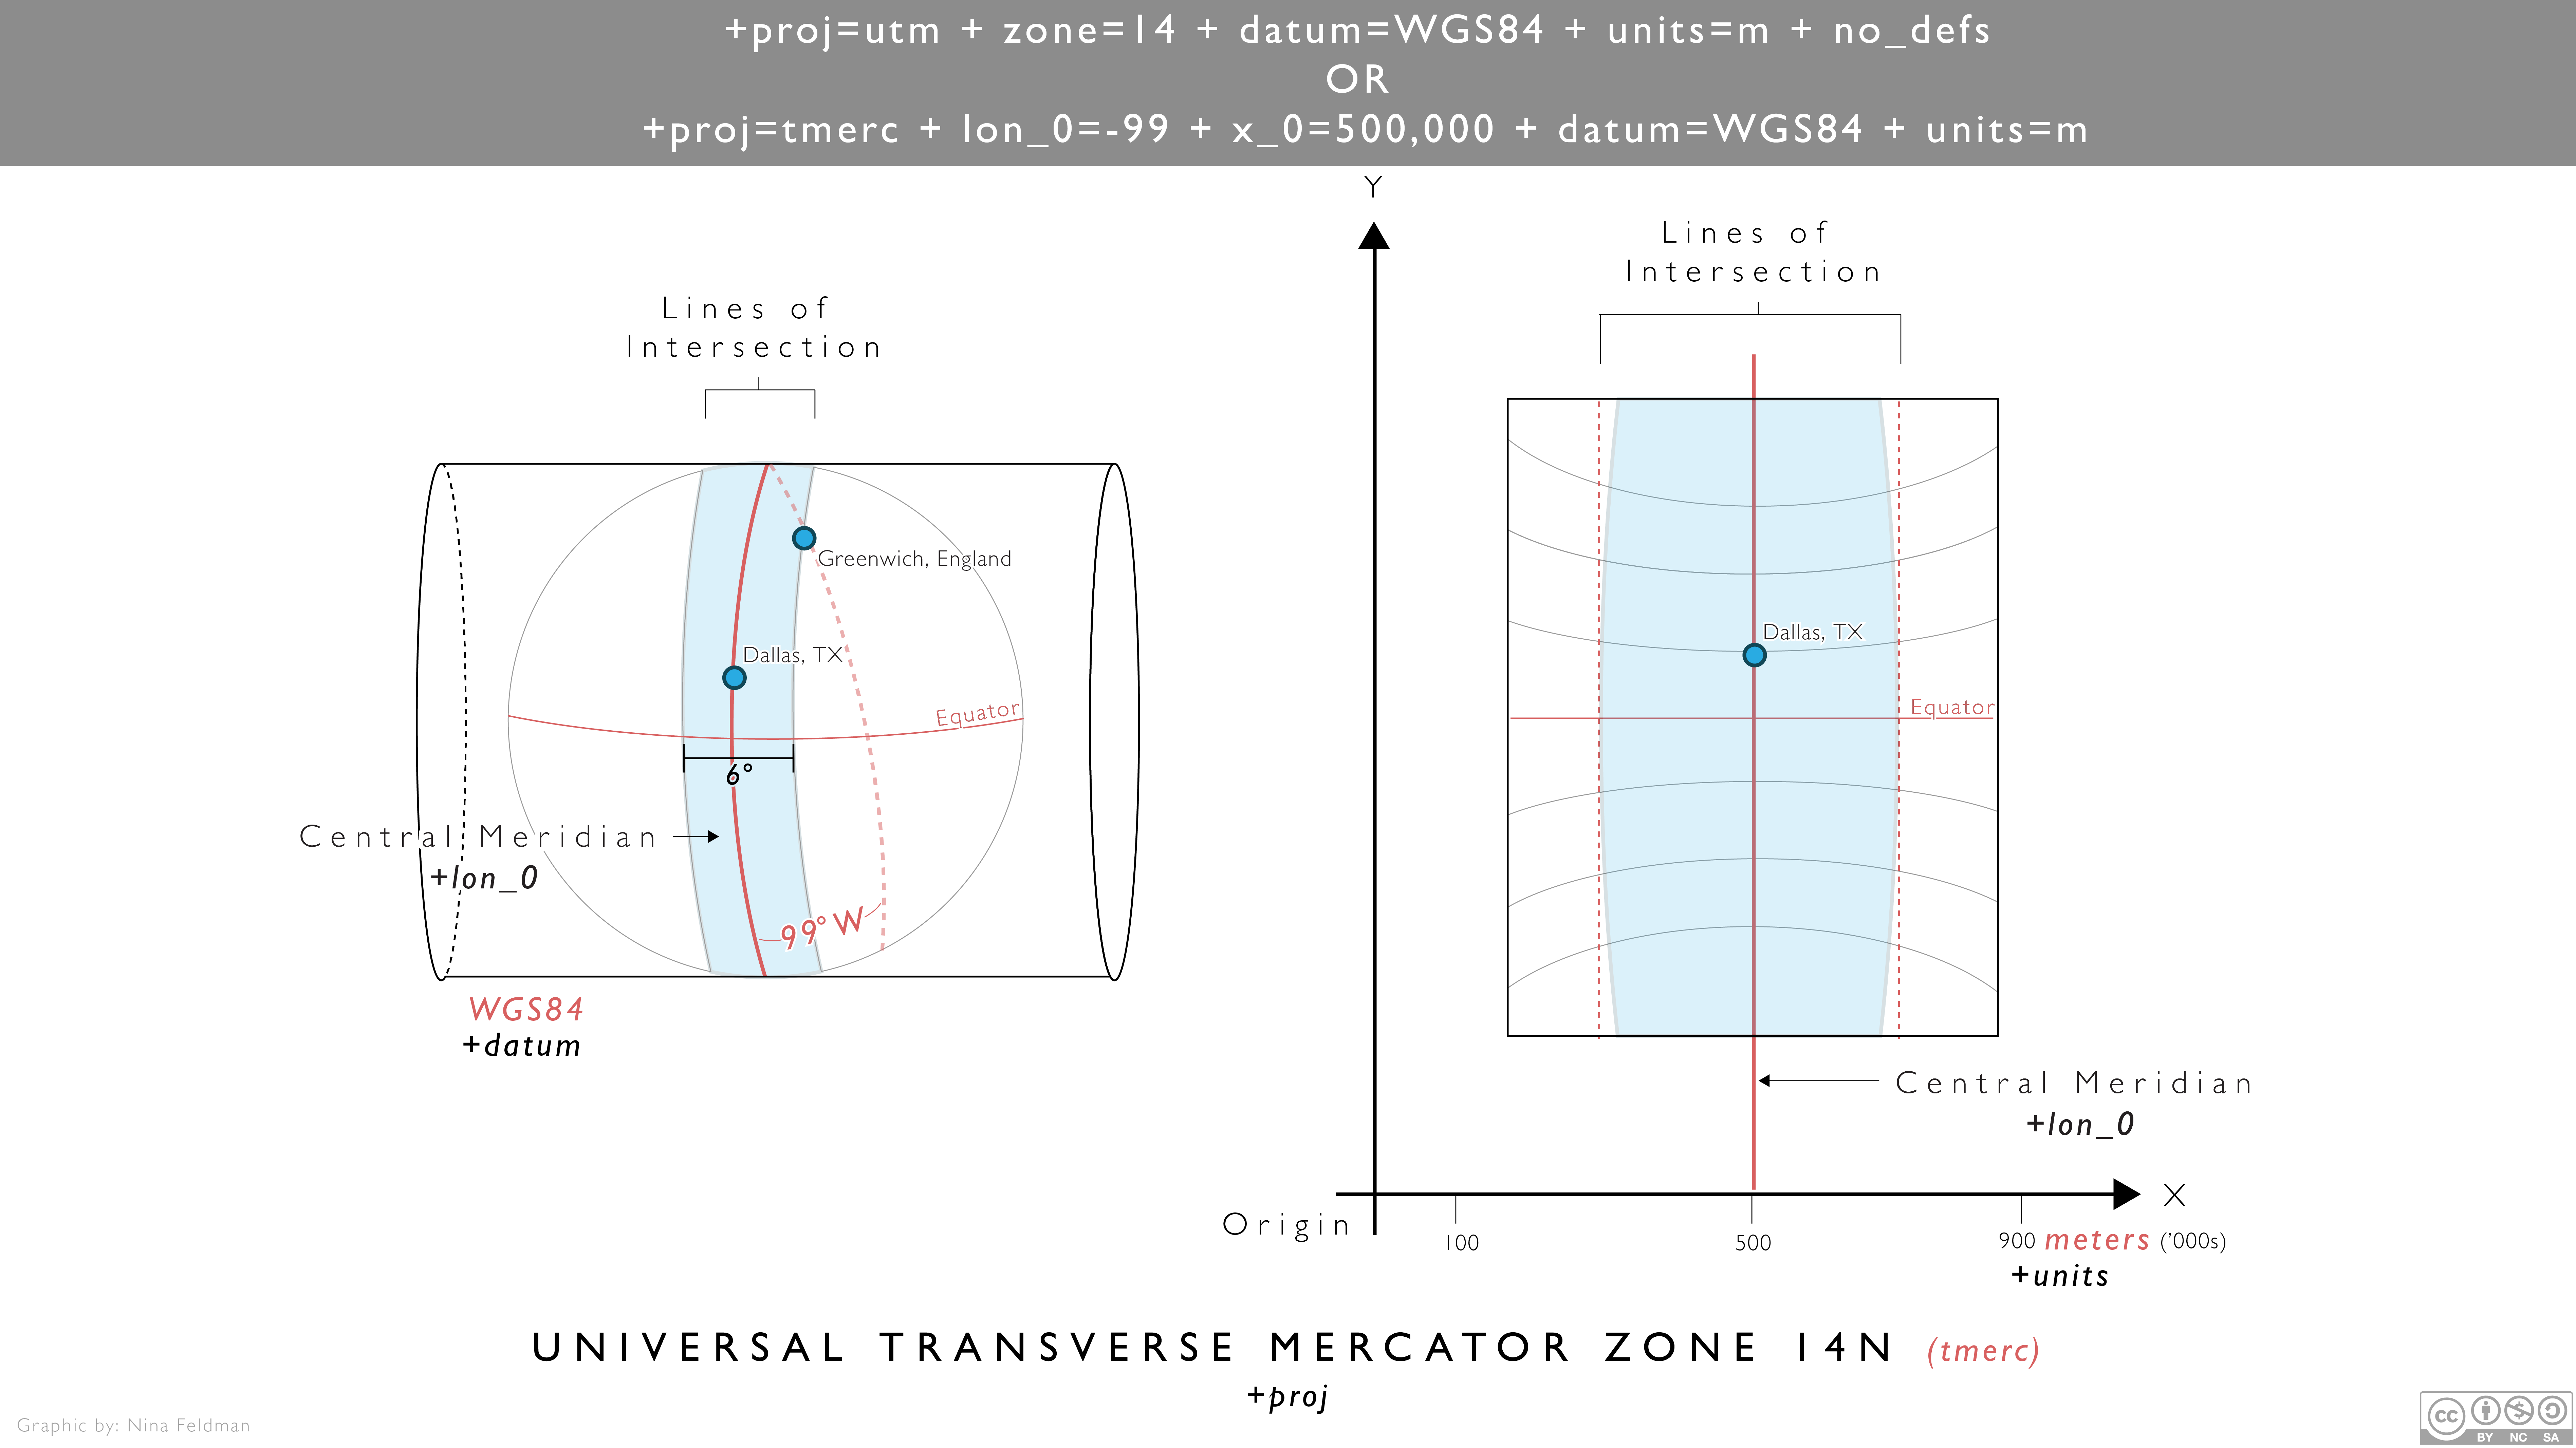

### Creating a custom CRS using PROJ.4 string

In [ ]:
map_data([dc], "Washington, DC - WGS84")

In [ ]:
print("Geometry of shapefile:\n{}".format(dc['geometry'].head()))

#### Reprojecting shapefile to a projected coordinate system

In [ ]:


print("Geometry of shapefile:\n{}".format(dc_lcc['geometry'].head()))

Notice how the values on the axes changed from latitude and longitude to meters.

Setting center point of projection
Also notice how the DC appears to be “tilted” to the left when compared to DC mapped using the previous CRS (WGS84). 

#### Setting center point of projection

We can change the values for lat_0 and lon_0, which refer to the latitude of origin and the central meridian, respectively. We will change those values to 38.9072 and -77.0369, which is the center of DC.

In [ ]:
dc_lcc_center = dc.copy()

dc_lcc_center = dc_lcc_center.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=33 +lat_2=45 +ellps=GRS80")

map_data([dc_lcc_center], "Washington, DC - Lambert Conformal Conic\nDC as Center")

#### Setting and exploring standard parallels

The PROJ.4 string for this projection has two additional parameters lat_1 and lat_2, which specify the first and second parallel respectively. Recall that a conic projection “intersects” a globe at what is termed the standard parallels.

Here, we will set our two standard parallels at 38.850 and 39.950 as they fall within the DC boundaries.

In [ ]:

map_data([dc_lcc_parallels_1], "Washington, DC - Lambert Conformal Conic\nStandard Parallels in DC")

Nothing really appears to be different; however, these values are important. Look what happens when we assign different values–ones that don’t really make sense for mapping in DC–and compare the resulting DC map to the previous map.

changes: dc_lcc_parallels_2 = dc_lcc_parallels_2.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 **+lat_1=10 +lat_2=60** +ellps=GRS80")


#### Setting false easting and false northing

Finally, two other parameters we can change are +x_0 and +y_0, which are false easting and false northing respectively. The values assigned to these parameters simply offset the axes by the respective values; they do not change or affect the projection. False easting (with a value of 500,000 m) is used in Universal Tranverse Mercator (UTM) projections so that negative coordinates are avoided to the west of the central meridian in each zone. Similarly, false northing (with a value of 10,000,000 m) is also used to avoid negative coordinates when a UTM zone is in the southern hemisphere.

Let’s set a false easting value of 500000 and a false northing value of 0.

In [ ]:
dc_lcc_false_e = dc.copy()



map_data([dc_lcc_false_e], "Washington, DC - Lambert Conformal Conic\nFalse Easting")

Notice that the x-axis shifted to the left by 500,000 meters. The y-axis stayed the same because we did not use false northing. Now, the “origin” is (500000, 0).

#### Comparing custom projection to Universal Tranverse Mercator

UTM is conformal. So let’s compare our custom projection to UTM Zone 18N (in which DC falls).

In [ ]:


map_data([dc_utm18n], "Washington, DC - UTM Zone 18N")

Looks pretty much the same as our custom one!

### EPSG Codes

Many CRSs are assigned and can be referenced by an EPSG code, which consists of a **four or five digit number**. </br> EPSG stands for the **European Petroleum Survey Group**, a now-defunct organization that compiled this CRS dataset. EPSG codes can be further explored with the EPSG Geodetic Parameter Dataset or at **SpatialReference.org**.

#### Obtaining EPSG code from PROJ.4 string

Not all CRSs have a corresponding EPSG code, but we can find the EPSG code (if it exists) given a PROJ.4 string. To do so, we can use the to_espg() function in the pyproj module.

In [ ]:
import pyproj

def get_epsg(proj4_string, min_confidence = 70):
    '''Function takes a PROJ.4 string and optional minimum confidence level as inputs and outputs the relevant EPSG code, if one exists. 
    Source: https://geopandas.org/docs/user_guide/projections.html'''
    
    # Get relevant EPSG at the specified minimum confience level
    return pyproj.CRS(proj4_string).to_epsg(min_confidence = min_confidence)


# Set variable to the PROJ.4 string of NAD83 / California zone 3
# Source: https://www.spatialreference.org/ref/epsg/26943/
proj4_full = "+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

result = get_epsg(proj4_full)

print("EPSG code for {}: {}.".format(proj4_full, result))

Success! In the example above, we were able to successfully obtain the EPSG code (in this case, 26943 for NAD83 / California zone 3) because it is exactly matched to the PROJ.4 string. </br>If we’re missing some information in the PROJ.4 string, however, we might not be able to get an exact EPSG code match.

In [ ]:
# Set variable to the PROJ.4 string of NAD83 / California zone 3, with a few parameters missing
proj4_missing = "+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

result_missing = get_epsg(proj4_missing)

print("EPSG code for {}: {}.".format(proj4_missing, result_missing))

#### Lowering minimum confidence parameter

In [ ]:
result_lower_confidence = get_epsg(proj4_missing, min_confidence = 20)

print("EPSG code for {}: {}.".format(proj4_missing, result_lower_confidence))

## Vector Coordinate Reference Systems (CRS)

### Define a Projection for Points, Lines, Polygons

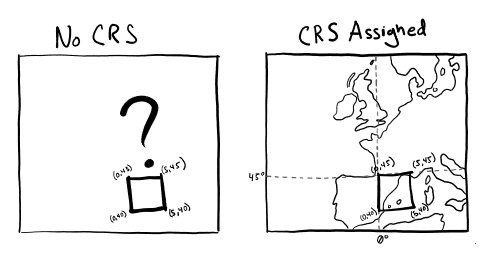

Every time we create vector data (or receive it from someone else), we need to make sure that a projection is assigned to it.

### Reproject Points, Lines, Polygons

Once a projection is assigned we often have to ‘reproject’ it to another one. Reprojection entails using a set of formulas to convert (x,y) stored in latitude and longitude into another coordinate space. </br> **This entails a two step process**.

Looking at the example below, we will move from Sinosoidal to Hobo-Dyer. The first step however is to use the “inverse equation” to convert coordinate pairs from Sinosoidal back to lat lon, and the use the forward equation to convert lat lon into the Hobo-Dyer coordinate space.

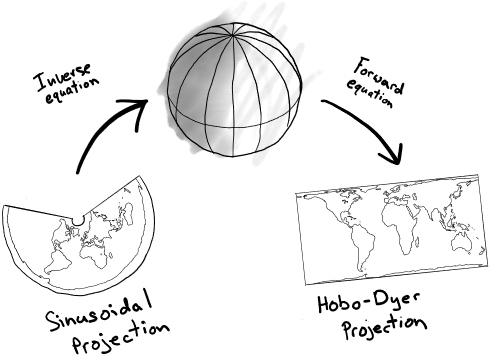

Refering back to our previous example, let’s use geopandas to move the prime meridian 10 degrees west:

## Affine Transforms

 it is used to distort raster data, for instance satellite imagery, to fit a new projection or CRS.

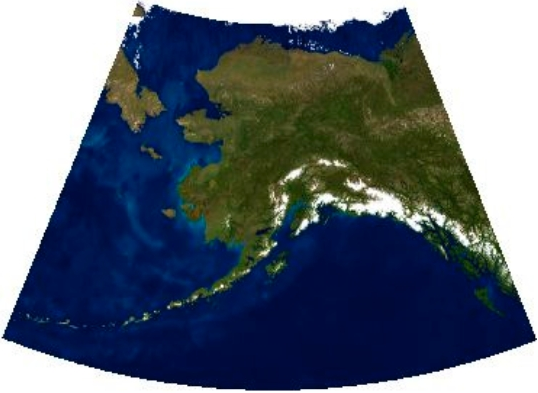

First some general properties of affine transforms:

* Preserves
    * Points, straight linear & planes
    * Sets of parallel lines
    * Ratio of distances between points on same straight line

* Distorts
    * Angle between lines
    * Distance between points

### Types of Transformations

<table class="colwidths-auto table">
<thead>
<tr class="row-odd"><th class="text-align:left head"><p>Transform</p></th>
<th class="text-align:right head"><p>Description</p></th>
<th class="text-align:right head"><p>Example</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td class="text-align:left"><p>Translation</p></td>
<td class="text-align:right"><p>Moves a set of points some fixed distance in the x and y plane</p></td>
<td class="text-align:right"><p>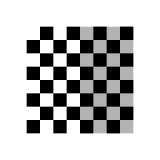</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>Scale</p></td>
<td class="text-align:right"><p>Increases or decreases the scale, or distance between points in the x and y plane</p></td>
<td class="text-align:right"><p>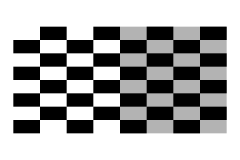</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>Rotate</p></td>
<td class="text-align:right"><p>Rotates points around the origin, or some defined axis</p></td>
<td class="text-align:right"><p>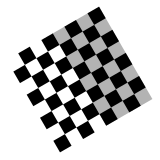</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>Shear</p></td>
<td class="text-align:right"><p>Shifts points in proportion to any given points x and y coordinate</p></td>
<td class="text-align:right"><p>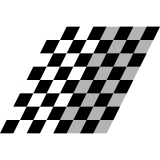</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p><em>Image Credit: <a class="reference external" href="https://en.wikipedia.org/wiki/Affine_transformation">Wikipedia</a></em></p></td>
<td class="text-align:right"><p></p></td>
<td class="text-align:right"><p></p></td>
</tr>
</tbody>
</table>

<div class="math notranslate nohighlight">
\begin{split}
   \begin{eqnarray}
     \mbox{Translate: }  \begin{bmatrix} 1 & 0 & \Delta x \\  0 & 1 & \Delta y \\ 0 & 0 & 1 \end{bmatrix}  
   \end{eqnarray}
\end{split}</div>
<p>Where <span class="math notranslate nohighlight">\(\Delta x\)</span> shifts in the <span class="math notranslate nohighlight">\(x\)</span> axis and <span class="math notranslate nohighlight">\(\Delta y\)</span> determines the shift in the <span class="math notranslate nohighlight">\(y\)</span> axis.</p>
<div class="math notranslate nohighlight">
\begin{split}
   \begin{eqnarray}
     \mbox{Rotate: } \begin{bmatrix} \cos\theta & -\sin\theta & 0 \\  \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   \end{eqnarray}
\end{split}</div>
<div class="math notranslate nohighlight">
\begin{split}
   \begin{eqnarray}
   \mbox{Scale: }  \begin{bmatrix} S_{x} & 0 & 0 \\ 0 & S_{y} & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   \end{eqnarray}
\end{split}</div>
<div class="math notranslate nohighlight">
\begin{split}
   \begin{eqnarray}
   \mbox{Shear: }  \begin{bmatrix} 1 & r_{x} & 0 \\ r_{y} & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   \end{eqnarray}
\end{split}</div>

## Raster Coordinate Reference Systems (CRS)

Raster data is very different that vector data, one of the key differences is that we don’t have a pair of coordinates (x,y) for each pixel in a raster. How then do we know where the raster is located in addition to what the data values are? For a new spatial raster (e.g. geotif) we need to store a few other pieces of information seperately. We need to keep track of the location of the upper left hand corner, the resolution (in both the x and y direction) and a description of the coordinate space (i.e. the CRS), amongst others.

Let’s start from the ndarray Z that we want to span from [-90°,90°] longitude, and [-90°,90°] latitude.

### Describing the Array Location (Define a Projection)

Both arrays have the same spatial resolution

But notice that the y resolution is negative:

In [ ]:
import rasterio
with rasterio.open(
    'Z.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(Z, 1)

### Reproject a Raster

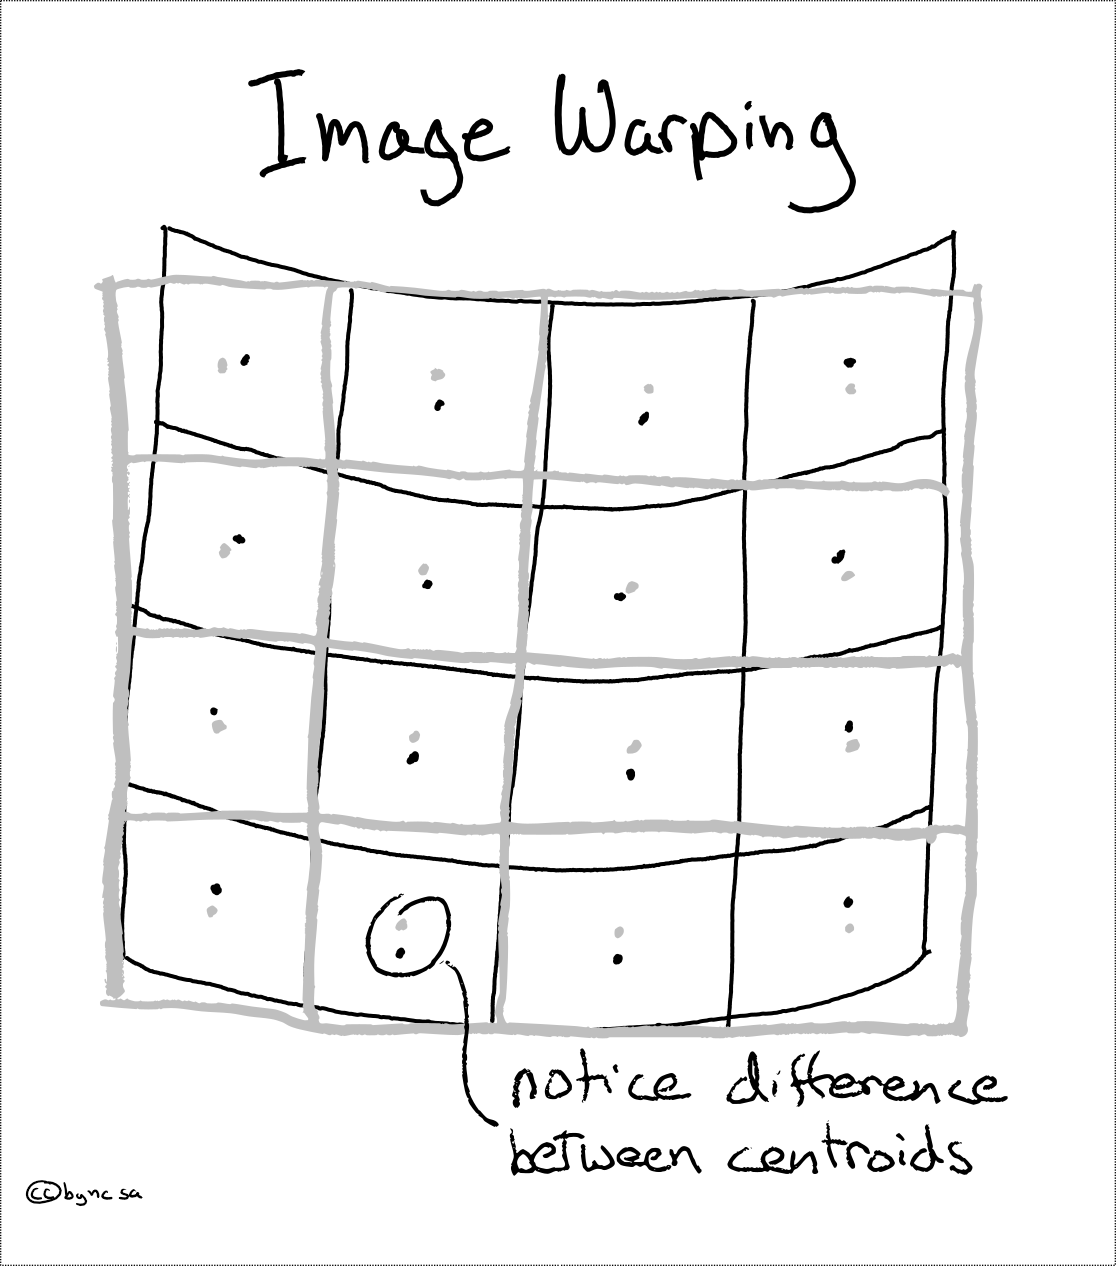

#### Choosing the Right Interpolation Method

Choosing the correct interpolation method is important. The following table should help you to decided. Remember categorical data might include land cover classes (forest, water, etc), and continuous data is measurable for instance rainfall (values 0 to 20mm).

<table class="colwidths-auto table">
<thead>
<tr class="row-odd"><th class="text-align:left head"><p>Method</p></th>
<th class="text-align:right head"><p>Description</p></th>
<th class="text-align:left head"><p>Fast</p></th>
<th class="text-align:right head"><p>Categorical</p></th>
<th class="text-align:left head"><p>Continuous</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td class="text-align:left"><p>Nearest<br>Neighbor</p></td>
<td class="text-align:right"><p>Assigns nearest value</p></td>
<td class="text-align:left"><p>Y</p></td>
<td class="text-align:right"><p>Y</p></td>
<td class="text-align:left"><p></p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>Bilinear</p></td>
<td class="text-align:right"><p>Linear estimation</p></td>
<td class="text-align:left"><p>Y</p></td>
<td class="text-align:right"><p></p></td>
<td class="text-align:left"><p>Y</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>Bicubic</p></td>
<td class="text-align:right"><p>Non-Linear estimation</p></td>
<td class="text-align:left"><p>Most of<br>the time</p></td>
<td class="text-align:right"><p></p></td>
<td class="text-align:left"><p>Y</p></td>
</tr>
</tbody>
</table>

For categorical data, Nearest Neighbor is your only choice, enjoy it. For continuous data, like quantity of rain, you can choose between Bilinear and Bicubic (i.e. “cubic convolution”). For most data Bilinear interpolation is fast and effective. However if you believe your data is highly non-linear, or widely spaced, you might consider using Bicubic. Some experimentation here is often informative.

### Reprojecting a Raster with Rasterio

runtime: 49 sec

In [ ]:
!pip install git+https://github.com/jgrss/geowombat

In [36]:
from geowombat.data import l8_224078_20200518

In [ ]:
l8_224078_20200518


landsat filename: [1](https://www.usgs.gov/faqs/what-naming-convention-landsat-collections-level-1-scenes)

In [ ]:


print("Source Transform:\n",src_transform,'\n')
print("Destination Transform:\n", dst_transform)

Notice that in order to keep the same number of rows and columns that the resolution of the destination raster increased from 30 meters to 33.24 meters. Also the coordinates of the upper left hand corner have shifted.

In [ ]:
!pip install leafmap

In [ ]:
!pip install localtileserver

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
l8_224078_20200518

# end of lesson09